In [126]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import math

pd.set_option('max_row',50)

from sklearn.preprocessing import MinMaxScaler
scaler100 = MinMaxScaler(feature_range=(1,100))
scaler10 = MinMaxScaler(feature_range=(1,10))

In [127]:
#Read CSV files
p2010 = pd.read_csv('FINAL_GEN_2010.csv')
p2019 = pd.read_csv('FINAL_GEN_2019.csv')

#Create Copy
p2010_df = p2010.copy()
p2019_df = p2019.copy()

In [128]:
p2019_df.isnull().sum().sum()

0

In [129]:
p2019_df.columns

Index(['Unnamed: 0', 'ct2010', 'Census_Tract', 'boro_code', 'shape_area',
       'shape_leng', 'geometry', 'Total_Population', 'Total_Male_Population',
       'Total_Female_Population', 'Per_Population_25_to_34_yrs',
       'Per_Population_35_to_44_yrs', 'Per_Population_45_to_54_yrs',
       'Median_Age', 'Total_Population_18_to_24_yrs',
       'Total_High_School_Graduates', 'Total_College_or_Associate_Degree',
       'Total_Bachelors_or_higher', 'Total_Population_25_yrs_or_over',
       'Total_Population_25_to_34_yrs', 'Total_House_Count',
       'Total_Houses_Built_2014_to_2019', 'Total_Houses_Built_2010_to_2013',
       'tot_occ_hous_units', 'med_hh_income', 'med_monthly_hous_cost',
       'tot_fams', 'tot_fams_1-10k', 'tot_fams_10-15k', 'tot_fams_15-25k',
       'frac_pop_25_to_54', 'gen_INDEX',
       'frac_Total_Houses_Built_2010_to_2019', 'tot_fams_1-25k',
       'frac_tot_fams_1-25k', 'frac_low_income', 'frac_high_income',
       'frac_med_monthly_hous_cost', 'gen_INDEX_v2'],
 

In [130]:
col_gen_index = ['frac_pop_25_to_54','Total_Bachelors_or_higher','frac_med_monthly_hous_cost','frac_high_income']

In [131]:
p2010_metrics=p2010_df[col_gen_index]
p2019_metrics=p2019_df[col_gen_index]

In [132]:
p2010_metrics.head()

,frac_pop_25_to_54,Total_Bachelors_or_higher,frac_med_monthly_hous_cost,frac_high_income
0,37.7,14.9,18.451238,74.176194
1,60.7,85.2,16.485171,85.897815
2,34.9,44.4,27.521516,28.571429
3,41.5,100.0,16.971878,80.063627
4,42.6,62.0,6.828892,56.410256


In [133]:
p2019_metrics.head()

,frac_pop_25_to_54,Total_Bachelors_or_higher,frac_med_monthly_hous_cost,frac_high_income
0,44.5,1.000000,31.065075,68.108974
1,47.6,12.118960,13.404372,84.083458
2,45.0,1.000000,18.157104,58.823529
3,55.6,7.992809,17.626863,88.227848
4,55.0,14.342922,36.786959,74.489796


In [134]:
data = [p2010_metrics,p2019_metrics]

In [135]:
p2010_metrics_normalized_df=(p2010_metrics-p2010_metrics.mean())/p2010_metrics.std()

In [136]:
p2019_metrics_normalized_df=(p2019_metrics-p2019_metrics.mean())/p2019_metrics.std()

In [137]:
p2010_metrics_normalized_df

,frac_pop_25_to_54,Total_Bachelors_or_higher,frac_med_monthly_hous_cost,frac_high_income
0,-0.820295,-0.182648,-0.482844,1.150449
1,1.888008,3.536111,-0.670521,2.145876
2,-1.150001,1.377855,0.382989,-2.722413
3,-0.372836,4.319007,-0.624061,1.650423
4,-0.243308,2.308867,-1.592292,-0.358276
...,...,...,...,...
2159,0.993091,3.694806,-0.774295,1.935176
2160,1.888008,3.298068,-0.912025,1.356391
2161,1.287471,0.108293,-0.262262,1.688832
2162,1.440549,0.912349,-1.208710,0.689346


In [138]:
p2019_metrics_normalized_df

,frac_pop_25_to_54,Total_Bachelors_or_higher,frac_med_monthly_hous_cost,frac_high_income
0,0.064779,-0.993809,0.558035,0.217344
1,0.402093,1.009320,-1.012715,1.661776
2,0.119185,-0.993809,-0.590005,-0.622257
3,1.272581,0.265976,-0.637165,2.036517
4,1.207295,1.409976,1.066941,0.794306
...,...,...,...,...
2159,0.358569,-0.031540,-0.835738,1.913636
2160,0.989673,-0.309017,-1.363613,1.535050
2161,1.011435,-0.425488,-0.898930,1.336985
2162,1.294343,0.046492,-0.777553,0.844348


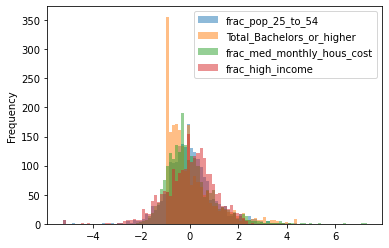

In [139]:
ax = p2010_metrics_normalized_df.plot.hist(bins = 100,alpha=0.5)

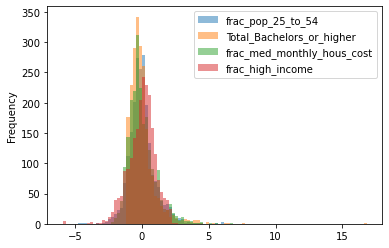

In [140]:
ax = p2019_metrics_normalized_df.plot.hist(bins = 100,alpha=0.5)

In [141]:
#table names in readable format
p2019_mndf = p2019_metrics_normalized_df
p2010_mndf = p2010_metrics_normalized_df

In [142]:
#Read CSV files
g2010 = pd.read_csv('g2010.csv')
g2019 = pd.read_csv('g2019.csv')

#Read Excel file - UDP
#Comparing Geo Ids - to check dataset viability - (Not useful)
UDP_dataset = pd.read_excel('Urban Displacement Project/udp_ny_final_typology_jan_2019.xlsx')

#Create Copy
g2010_df = g2010.copy()
g2019_df = g2019.copy()
UDP_df = UDP_dataset.copy()

dataset = [g2010_df,g2019_df]

#Set Geometry for 2010 dataset
dataset[0]['geometry'] = gpd.GeoSeries.from_wkt(dataset[0]['geometry'])
gdf_2010 = gpd.GeoDataFrame(dataset[0],geometry="geometry")

#Set Geometry for 2019 dataset
dataset[1]['geometry'] = gpd.GeoSeries.from_wkt(dataset[1]['geometry'])
gdf_2019 = gpd.GeoDataFrame(dataset[1],geometry="geometry")



In [143]:
gdf_dataset = [gdf_2010,gdf_2019]

In [144]:
#drop first column from both tables
for gframe in gdf_dataset:
    gframe.drop(columns = gframe.columns[0],axis=1,inplace=True)

In [145]:
gdf_2010.columns

Index(['ct2010', 'Census_Tract', 'boro_code', 'shape_area', 'shape_leng',
       'geometry', 'Total_Population', 'Total_Male_Population',
       'Total_Female_Population', 'Per_Population_25_to_34_yrs',
       'Per_Population_35_to_44_yrs', 'Per_Population_45_to_54_yrs',
       'Median_Age', 'Total_Population_18_to_24_yrs',
       'Total_High_School_Graduates', 'Total_College_or_Associate_Degree',
       'Total_Bachelors_or_higher', 'Total_Population_25_yrs_or_over',
       'Total_Population_25_to_34_yrs', 'Total_House_Count',
       'Total_Houses_Built_2005_to_2010', 'Total_Houses_Built_2000_to_2004',
       'GEO_ID_x', 'tot_occ_hous_units', 'med_hh_income',
       'med_monthly_hous_cost', 'GEO_ID_y', 'tot_fams', 'tot_fams_1-10k',
       'tot_fams_10-15k', 'tot_fams_15-25k'],
      dtype='object')

In [146]:
gdf_2010

,ct2010,Census_Tract,boro_code,shape_area,shape_leng,geometry,Total_Population,Total_Male_Population,Total_Female_Population,Per_Population_25_to_34_yrs,...,Total_Houses_Built_2000_to_2004,GEO_ID_x,tot_occ_hous_units,med_hh_income,med_monthly_hous_cost,GEO_ID_y,tot_fams,tot_fams_1-10k,tot_fams_10-15k,tot_fams_15-25k
0,900,9.00,5,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",1880,909,971,10.6,...,44,1400000US36085000900,693,56192,1234,1400000US36085000900,1487,290,21,73
1,9800,98.00,1,1.906016e+06,5534.200306,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",7045,2931,4114,30.9,...,0,1400000US36061009800,4253,101191,2078,1400000US36061009800,6772,390,161,404
2,10200,102.00,1,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",189,81,108,7.9,...,0,1400000US36061010200,89,41809,1193,1400000US36061010200,189,27,23,85
3,10400,104.00,1,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",981,444,537,14.1,...,6,1400000US36061010400,674,85455,1785,1400000US36061010400,943,51,44,93
4,11300,113.00,1,1.890907e+06,5699.860712,"POLYGON ((-73.98412 40.75484, -73.98460 40.754...",195,89,106,14.9,...,9,1400000US36061011300,75,113618,1538,1400000US36061011300,195,45,9,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,14802,148.02,1,1.351073e+06,4691.030751,"POLYGON ((-73.95166 40.78201, -73.95212 40.781...",6309,2827,3482,22.0,...,67,1400000US36061014802,3376,103203,2038,1400000US36061014802,5596,552,194,182
2160,6700,67.00,3,1.680804e+06,5236.047697,"POLYGON ((-73.99441 40.68545, -73.99458 40.685...",3184,1402,1782,29.2,...,28,1400000US36047006700,1472,107851,2017,1400000US36047006700,2701,274,141,217
2161,7500,75.00,3,3.052947e+06,7513.484999,"POLYGON ((-73.99042 40.68269, -73.98827 40.681...",4922,2537,2385,19.8,...,11,1400000US36047007500,2103,82250,1944,1400000US36047007500,3993,318,182,278
2162,5300,53.00,3,1.769699e+07,55178.828324,"POLYGON ((-74.00485 40.68567, -74.00518 40.685...",2037,972,1065,34.8,...,10,1400000US36047005300,873,68393,1125,1400000US36047005300,1779,285,75,196


'Manhatten' : 1, " Bronx County": 2, " Kings County": 3, " Queens County": 4, " Richmond County": 5

Taking Population avg from Total_Population column

In [183]:
county_pop_avg_list_2019 = []
for i in range(1,6):
    county_pop_avg_list_2019.append(gdf_2019[gdf_2019['boro_code'] == i]['Total_Population'].mean())

county_pop_avg_list_2010 = []
for i in range(1,6):
    county_pop_avg_list_2010.append(gdf_2010[gdf_2010['boro_code'] == i]['Total_Population'].mean())

In [184]:
county_pop_avg_list_2019

[5666.642361111111,
 4225.455621301775,
 3407.8605263157897,
 3424.2335329341317,
 4317.209090909091]

In [185]:
county_pop_avg_list_2010

[5497.725694444444,
 4006.5325443786983,
 3245.7657894736844,
 3292.1691616766466,
 4213.181818181818]

In [150]:
county_pop_thresh = []
for i in range(5):
    county_pop_thresh.append(math.ceil(county_pop_avg_list_2019[i])*0.05) #take 5% as threshold for each county

In [151]:
county_pop_thresh

[283.35, 211.3, 170.4, 171.25, 215.9]

In [152]:
M_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 1]
Bx_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 2]
B_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 3]
Q_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 4]
S_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 5]



In [170]:
ingore_tracts_M = (M_tract[M_tract['Total_Population'].astype(int) < county_pop_thresh[0]]['Census_Tract']).index
ingore_tracts_Bx = (Bx_tract[Bx_tract['Total_Population'].astype(int) < county_pop_thresh[1]]['Census_Tract']).index
ingore_tracts_B = (B_tract[B_tract['Total_Population'].astype(int) < county_pop_thresh[2]]['Census_Tract']).index
ingore_tracts_Q = (Q_tract[Q_tract['Total_Population'].astype(int) < county_pop_thresh[3]]['Census_Tract']).index
ingore_tracts_S = (S_tract[S_tract['Total_Population'].astype(int) < county_pop_thresh[4]]['Census_Tract']).index

In [171]:
ingore_tracts_M

Int64Index([2, 4, 596, 1018, 1019, 1022, 1178, 1485, 1515, 1649, 1824, 2093,
            2149],
           dtype='int64')

In [172]:
type(ingore_tracts_M)

pandas.core.indexes.numeric.Int64Index

In [173]:
ingore_tracts_M = np.asarray(ingore_tracts_M)
ingore_tracts_Bx = np.asarray(ingore_tracts_Bx)
ingore_tracts_B = np.asarray(ingore_tracts_B)
ingore_tracts_Q = np.asarray(ingore_tracts_Q)
ingore_tracts_S = np.asarray(ingore_tracts_S)

In [177]:
Ignore_tracts_index = np.concatenate((ingore_tracts_M,ingore_tracts_Bx,ingore_tracts_B,ingore_tracts_Q,ingore_tracts_S))

In [178]:
Ignore_tracts_index

array([   2,    4,  596, 1018, 1019, 1022, 1178, 1485, 1515, 1649, 1824,
       2093, 2149, 1173, 1211, 1372, 1401, 1406, 2047, 2051, 2052,  475,
        674,  986,  993, 1459, 1658, 1840, 2015, 2021, 2054, 2157,  501,
        678,  752,  792,  853,  981, 1036, 1063, 1071, 1134, 1414, 1562,
       1604, 1650, 1808, 1875, 1891, 1903, 1946, 1978, 1984, 2005, 2018,
       2023, 2029, 2049, 2155, 1999, 2038, 2136])

In [179]:
len(Ignore_tracts_index)

62

In [180]:
#sanity check
len(set(Ignore_tracts_index))

62